<div style="text-align: right; font-size: 20px">Andrew Lee</div>
<div style="text-align: right; font-size: 20px">STAT 350 DL1</div>

<div style="text-align: center; font-size: 24px; font-weight: bold">Assignment #4</div>

<div style="text-align: center; font-size: 18px">Problem 1</div>

In [37]:
# Import library and dataset

suppressMessages(library(readxl))
suppressMessages(library(magrittr))
suppressMessages(library(ggplot2))
suppressMessages(library(tidyr))
suppressMessages(library(dplyr))
suppressMessages(library(broom))
suppressMessages(library(png))

physical_data <- read_excel("physical.xlsx")

#### a). Our sample proportion would be 0.3470.

In [2]:
# Rename column
colnames(physical_data)[colnames(physical_data) == "Exercise?"] <- "exercise"

In [3]:
# Calculating and displaying the frequency

# Calculate the frequency
freq <- nrow(physical_data) - sum(physical_data$exercise)
  
# Calculate the relative frequency for active
rel_freq <- freq / nrow(physical_data)

# Create a data frame to display the results
freq_df <- data.frame(relative_freq = rel_freq, frequency = freq)

# Display the data frame
freq_df

relative_freq,frequency
<dbl>,<dbl>
0.3470106,296


#### b). Our population parameter is the proportion of all US adults who do not exercise. In this problem it is estimated to be 0.32 or 32% of all US adults.

#### c). Our null hypothesis would be p = 0.32 and our alternative hypothesis would be p > 0.32.

#### d). **WORK/CODE shown below:** This dataset does pass the conditions of CLT to use the one proportion z-test as there are both 10 > successes and failures.

In [9]:
# Calculating the number of successes
successes <- 0.32 * 853

# Calculating the number of failures
failures <- 0.68 * 853

# Create a data frame to display the results
clt_req_df <- data.frame(success = successes, failure = failures)

clt_req_df

success,failure
<dbl>,<dbl>
272.96,580.04


#### e). Our test stat is: 1.69 and we got this by first calculating our standard error by taking the square root of the product of the estimated population proportion and its complement, divided by the sample size. Then we divide the difference between our observed proportion by our null proportion by our standard error to get our test statistic

In [10]:
# Sample data
null_prop <- 0.32
sample_size <- 853

# Calculate standard error
SE <- sqrt((null_prop * (1 - null_prop)) / sample_size)

# Calculate the test stat
observed_prop <- 0.3470106
z_stat <- (observed_prop - null_prop) / SE

# Display the test stat
data.frame(test_stat = z_stat)

test_stat
<dbl>
1.691139


#### f). <img src="ztest.png">

#### g). We have sufficient evidence to reject our null hypothesis (the population proportion of US adults who do not exercise is equal to 0.32) as our p of 0.0454 value is less than our significance level of 0.05

#### h). We significant evidence to suggest that the proportion of US adults who do not exercise who do not exercise is greater than 0.32.

#### i). If our significance level were to change to 0.01 we would fail to reject our null hypothesis as our p-value of 0.0454 is greater than our signifance level. This would be that we do NOT have significant evidence to suggest that the proportion of US adults who do not exercise is greater than 0.32.

<div style="text-align: center; font-size: 18px">Problem 2</div>

#### a).

In [11]:
data.frame("." = c("Open all mail", "Don't open all mail", " "), 
           "forty_younger" = c(414, 386, 800),
           "fourty_one_older" = c(532, 368, 900),
           "total" = c(414 + 532, 368 + 386, 1700))

.,forty_younger,fourty_one_older,total
<chr>,<dbl>,<dbl>,<dbl>
Open all mail,414,532,946
Don't open all mail,386,368,754
,800,900,1700


#### b). The null hypothesis is that there is no difference in the proportions of individuals opening their mail among the age groups: H0: p1 - p2 = 0 The alternative hypothesis is that there is a difference in the proportions of individuals opening their mail among the age groups: HA: p1 - p2 ≠ 0 where p1 and p2 are the true population proportions of individuals who open all of their mail in the 40 and younger age group and the 41 and older age group, respectively.

#### c). To estimate our parameter (p1 - p2) we will use the difference of p(hat)1 = 414/800 = 0.5175 and p(hat)2 = 532/900 = 0.5911 to get a value of -0.0736.

#### d). To check our conditions, we must verify that the samples are both random, independent, and large enough. We know our sample is both random and independent because 1. a person cannot be in both groups at the same time 2. the prompt specifies that the sample was collected randomly. To check if the sample is large enough, we need to check the success-failure condition. Both samples have more than 10 successes and 10 failures, so we can conclude that the success-failure condition is met.

#### For the 40 and younger age group sample:
##### - Number of successes (individuals who open all of their mail) = 414
##### - Number of failures (individuals who do not open all of their mail) = 386

#### For the 41 and older age group sample:
##### - Number of successes (individuals who open all of their mail) = 532
##### - Number of failures (individuals who do not open all of their mail) = 368

#### e). Our test statistic would be -3.0493 and our p value would be 0.0023

In [12]:
# Sample proportions and sample sizes
p1 <- 414/800
p2 <- 532/900
n1 <- 800
n2 <- 900
combined <- ((414 + 532)/(900 + 800))

# Standard error of the difference in proportions
SE <- sqrt(combined * (1 - combined) * ((1/n1) + (1/n2)))

# Difference in sample proportions
p_diff <- p1 - p2

# Z-statistic
z <- p_diff / SE

data.frame(test_stat = z)

test_stat
<dbl>
-3.049319


<img src="ztest_2.png">

#### f). Our p value of 0.0023 would make us reject the null hypothesis and tells us that there is significant evidence that there is a difference between the proportion between the age groups for the people who open their mail.

#### g). H0: There is no association between age group and the proportion of people who open all of their mail. (They are independent) HA: There is an association between age group and the proportion of people who open all of their mail. (They are dependent)

#### h). Our first condition of a multinomial experiment is satisfied as we have a random sample from our populations of interest. Our second condition is satisfied as every expected value is > 5

In [13]:
# Calc our expected values
grand_total <- sum(matrix(c(414, 386, 532, 368), byrow = TRUE, ncol = 2))
expected <- matrix(c(
  (rowSums(matrix(c(414, 386, 532, 368), byrow = TRUE, ncol = 2))[1] * colSums(matrix(c(414, 386, 532, 368), byrow = TRUE, ncol = 2))[1])/grand_total,
  (rowSums(matrix(c(414, 386, 532, 368), byrow = TRUE, ncol = 2))[2] * colSums(matrix(c(414, 386, 532, 368), byrow = TRUE, ncol = 2))[1])/grand_total,
  (rowSums(matrix(c(414, 386, 532, 368), byrow = TRUE, ncol = 2))[1] * colSums(matrix(c(414, 386, 532, 368), byrow = TRUE, ncol = 2))[2])/grand_total,
  (rowSums(matrix(c(414, 386, 532, 368), byrow = TRUE, ncol = 2))[2] * colSums(matrix(c(414, 386, 532, 368), byrow = TRUE, ncol = 2))[2])/grand_total
), byrow = TRUE, ncol = 2)

rownames(expected) <- c("Open", "Don't Open")
colnames(expected) <- c("Forty Minus", "Forty One Plus")

expected

,Forty Minus,Forty One Plus
Open,445.1765,500.8235
Don't Open,354.8235,399.1765


#### i). In order to get our expected values, we need to divide the product of our row total and column total by our grand total. (Work/code doing this shown in part h)

#### In order to calculate individual impact to chi-squared we will square the difference between our observed and expected and divide that by our observed value. WE will sum these together to get chi squared. (Work/code doing this shown below)

In [14]:
# Display our expected values
expected

,Forty Minus,Forty One Plus
Open,445.1765,500.8235
Don't Open,354.8235,399.1765


In [15]:
# Format data in a way that we can create contingency table
observed = matrix(c(414, 532, 386, 368), byrow = TRUE, ncol = 2)

# Initialize an empty matrix with the same dimensions as the observed matrix
contribution_mat <- matrix(0, nrow = nrow(observed), ncol = ncol(observed))

# Loop through each cell in the matrices and calculate the contribution to chi-square
for (i in 1:nrow(observed)) {
  for (j in 1:ncol(observed)) {
    contribution_mat[i, j] <- ((observed[i, j] - expected[i, j])^2) / expected[i, j]
  }
}

rownames(contribution_mat) <- c("Open", "Don't Open")
colnames(contribution_mat) <- c("Forty Minus", "Forty One Plus")

# Display the contributions to chi squared
contribution_mat

# Sum them together to get chi squared
data.frame(chi_squared = sum(contribution_mat))

,Forty Minus,Forty One Plus
Open,2.183342,1.940748
Don't Open,2.739312,2.434944


chi_squared
<dbl>
9.298346


#### j).

In [38]:
# Verifying our results
chisq.test(observed, correct = FALSE) %>%
    glance()

statistic,p.value,parameter,method
<dbl>,<dbl>,<dbl>,<chr>
16.06588,0.01340469,6,Chi-squared test for given probabilities


#### k). We would reject our null hypothesis as we have signifcant evidence to suggest that our there is an association between age group and the proportion of people who open all of their mail. (They are dependent)

#### l). The people who are younger than 40 and don't open all their mail contributed the most towards the chi-squared value. However, all of the cells seemed to contribute similarly to the chi squared value

<div style="text-align: center; font-size: 18px">Problem 3</div>

#### a). The null hypothesis is that all seven days of the week are equally likely for childbirth, and the alternative hypothesis is that they are not equally likely. H0: p1 = p2 = p3 = p4 = p5 = p6 = p7 = 1/7 HA: At least one pi is different from the others. Where p1, p2, ..., p7 are the probabilities of being born on Monday, Tuesday, ..., Sunday, respectively.

#### b). Our conditions are fulfilled as the number of sucesses is 5> for each level. Additionally, the sample was collected randomly and each observation is independent

#### Our test statistic is 16.06588.

In [41]:
# Checking conditions
# perform chi-squared goodness-of-fit test
observed <- c(63, 70, 70, 69, 68, 45, 40)
expected_prop <- rep(1/7, 7)

births_test <- chisq.test(x = observed, p = expected_prop, correct = FALSE) %>%
    glance()

observed <- as.data.frame(observed,
                          row.names = c("Monday", 
                                        "Tuesday", 
                                        "Wednesday", 
                                        "Thursday", 
                                        "Friday", 
                                        "Saturday", 
                                        "Sunday"))
expected <- as.data.frame(expected,
                          row.names = c("Monday", 
                                        "Tuesday", 
                                        "Wednesday", 
                                        "Thursday", 
                                        "Friday", 
                                        "Saturday", 
                                        "Sunday"))

# Checking to see if each level has at least 5 observations
expected
observed

# Test stat
births_test

,expected
,<dbl>
Monday,60.71429
Tuesday,60.71429
Wednesday,60.71429
Thursday,60.71429
Friday,60.71429
Saturday,60.71429
Sunday,60.71429


,observed
,<dbl>
Monday,63
Tuesday,70
Wednesday,70
Thursday,69
Friday,68
Saturday,45
Sunday,40


statistic,p.value,parameter,method
<dbl>,<dbl>,<dbl>,<chr>
16.06588,0.01340469,6,Chi-squared test for given probabilities


#### c). Our rejection region is values greater than 12.591587243744.

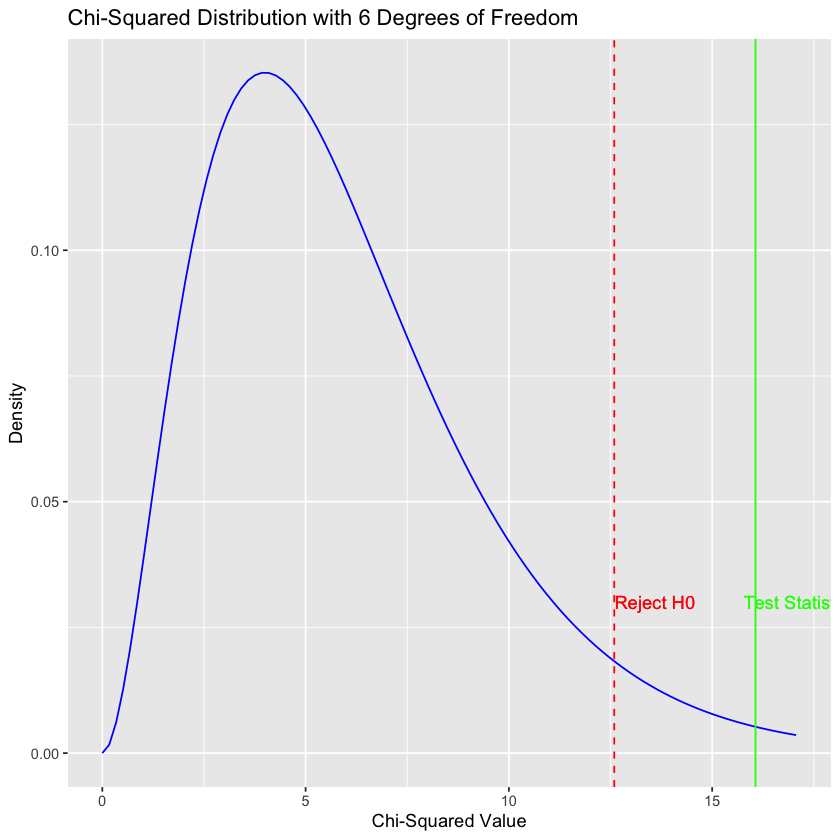

In [93]:
# plot chi-squared distribution with rejection region and test statistic labeled
observed <- c(63, 70, 70, 69, 68, 45, 40)
expected <- rep(1/7 * sum(observed), 7)

df <- 6  # degrees of freedom

ggplot(data.frame(x = c(0, qchisq(0.95, df))), aes(x = x)) +
  stat_function(fun = dchisq, args = list(df = df), color = "blue") +
  geom_vline(xintercept = qchisq(0.95, df), color = "red", linetype = "dashed") +
  geom_vline(xintercept = sum((observed - expected)^2/expected), color = "green") +
  geom_text(aes(x = qchisq(0.95, df) + 1, y = 0.03, label = "Reject H0"), color = "red") +
  geom_text(aes(x = sum((observed - expected)^2/expected) + 1, y = 0.03, label = "Test Statistic"), color = "green") +
  ggtitle(paste0("Chi-Squared Distribution with ", df, " Degrees of Freedom")) +
  xlab("Chi-Squared Value") +
  ylab("Density")

In [45]:
# Rejection region
qchisq(0.95, df)

[1] 12.59159

#### d). Our p value is 0.0134 and our degrees of freedom is 6

In [50]:
births_test %>%
    select(p.value)

p.value
<dbl>
0.01340469


#### e). Based on the p-value of 0.0134, we can reject the null hypothesis

#### f). Based on the p-value of 0.0134, we can reject the null hypothesis and conclude that the probabilities of childbirth are not equal across all seven days of the week. This means that at least one day has a significantly different probability than the others. Therefore, we can accept the alternative hypothesis that at least one pi is different from the others. 

<div style="text-align: center; font-size: 18px">Problem 4</div>

#### a). This is an observational study since the researchers did not manipulate or control any variables.

#### b). The explanatory variable: Amount of fish in the diet (categorical) and the response variable: Likelihood of prostate cancer (categorical).

#### c). Hypotheses: Ho: There is no association between the amount of fish in the diet and the likelihood of prostate cancer. Ha: There is an association between the amount of fish in the diet and the likelihood of prostate cancer.



#### d). Independence: The observations must be independent of each other. In this case, we assume that the 6,272 Swedish men in the study were randomly selected and that their fish consumption and prostate cancer status were independent of each other.

#### Sample size: Each expected cell count should be greater than or equal to 5. Looking at the expected value table you provided, all expected cell counts appear to meet this condition.

#### Since both conditions are satisfied, we can proceed with conducting the chi-squared test for independence to test whether there is an association between fish consumption and the likelihood of prostate cancer.






In [69]:
fish_observed <- matrix(c(42, 209, 201, 14, 507, 2769, 2420, 110), 
       nrow = 2, byrow = TRUE, 
       dimnames = list(c("Yes", "No"), 
                       c("Large", "Moderate", "Small", "None")))


# Display
fish_observed
fish_expected <- chisq.test(fish_observed, correct = FALSE)$expected
fish_expected

,Large,Moderate,Small,None
Yes,42,209,201,14
No,507,2769,2420,110


,Large,Moderate,Small,None
Yes,40.78986,221.2608,194.7363,9.21301
No,508.21014,2756.7392,2426.2637,114.78699


#### e).

In [66]:
# Test statistic
chisq.test(fish_observed, correct = FALSE) %>%
    glance() %>%
        select(statistic)

statistic
<dbl>
3.677281


#### f). 

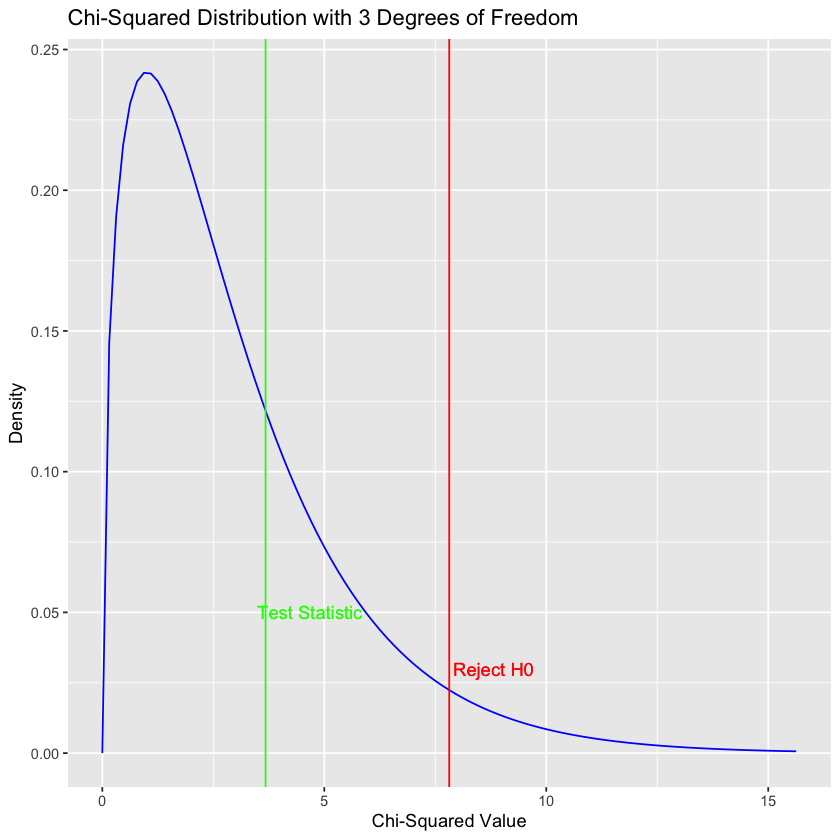

In [94]:
# Rejection region
df2 <- 3

ggplot(data.frame(x = c(0, qchisq(0.95, df2))), aes(x = x)) +
    stat_function(fun = dchisq, args = list(df = df2), color = "blue") +
    geom_vline(xintercept = sum((fish_observed - fish_expected)^2/fish_expected), color = "green") +
    geom_vline(xintercept = qchisq(0.95, df2), color = "red") +
    geom_text(aes(x = qchisq(0.95, df2) + 1, y = 0.03, label = "Reject H0"), color = "red") +
    geom_text(aes(x = sum((fish_observed - fish_expected)^2/fish_expected) + 1, y = 0.05, label = "Test Statistic"), color = "green") +
    ggtitle(paste0("Chi-Squared Distribution with ", df2, " Degrees of Freedom")) +
    xlab("Chi-Squared Value") +
    ylab("Density") +
    xlim(c(0, critical_value*2))


In [95]:
# Rejection region
qchisq(0.95, df2)

[1] 7.814728

#### g). The p-value is 0.2985 and our degrees of freedom is 3

In [97]:
chisq.test(fish_observed, correct = FALSE) %>%
    glance() %>%
        select(p.value)

p.value
<dbl>
0.2984868


#### h). Because our p value is greater than 0.05 as such, we fail to reject the null hypothesis.

#### i). Because we accept our null hypothesis we can conclude that there is not enough evidence to suggest that there is a statistically significant association between the amount of fish in the diet and the likelihood of prostate cancer in Swedish men.